Leire Yining Santos Gil (leirey01@ucm.es)\
Jesus Sierralaya (jsierral@ucm.es)

# Load libraries

In [1]:
# Supress info messages
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import time

2.13.0


# Used functions

In [2]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_mse'],'b',
           label = 'Validation Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

# Data

In [3]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data",
                                       "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG', 'Cylinders','Displacement','Horsepower','Weight','Acceleration','Model year','Origin']
data = pd.read_csv(dataset_path, names=column_names, na_values="?",
                          comment='\t', sep=" ", skipinitialspace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


# Pre-process

In [5]:
data = data.dropna() 
o = data.pop('Origin')
data['USA'] = (o == 1)*1.0
data['Europe'] = (o == 2)*2.0
data['Japan'] = (o == 3)*3.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model year    392 non-null    int64  
 7   USA           392 non-null    float64
 8   Europe        392 non-null    float64
 9   Japan         392 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 33.7 KB


In [7]:
X = data.drop('MPG', axis=1)  # Drop the col 'y
y = data['MPG']  # Target

In [8]:
# Using the train_test_split function from sklearn lib
# random_state for make the answer reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
# Normalize the data
scaler = StandardScaler()
# mean 0 variance 1
X_train = scaler.fit_transform(X_train)
# using the same mean and sd than the train
X_test = scaler.transform(X_test)

# Reference model

In [9]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear') 
])

# Compile
model.compile(loss='mse',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['mse','mae'])

## Training

Time training: 12.161378622055054


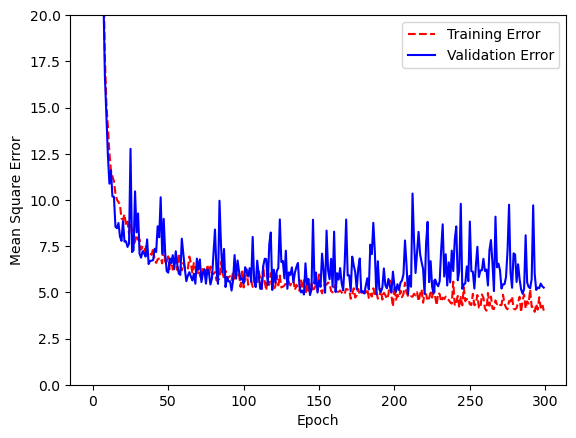

In [10]:
start = time.time()
history = model.fit(X_train, y_train,
                    epochs = 300,
                    validation_split = 0.2,  
                    verbose = 0) 
end = time.time()
time_0 = end - start
print('Time training:', time_0)
plot_history(history)

## Dispersion and R^2

3/3 [==============================] - 0s 2ms/step


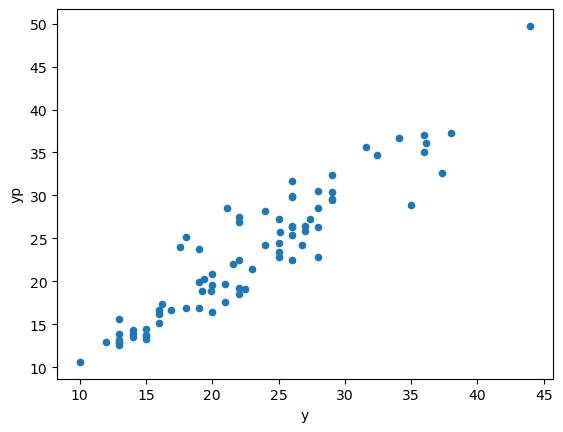

R² model: 0.8508


In [11]:
yp = model.predict(X_test)

df = pd.DataFrame({'y': y_test, 'yp': yp.flatten()})
df.plot.scatter(x='y', y='yp')
plt.show()

r2_0 = r2_score(df['y'], df['yp'])
print(f"R² model: {r2_0:.4f}")

# Model 1: Simplified

I simplified the architecture, switched to Adam optimizer, and reduced epochs for efficiency.

In [12]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='linear') 
])

# Compile
model.compile(loss='mse',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mse','mae'])

## Training

Time training: 8.838109016418457


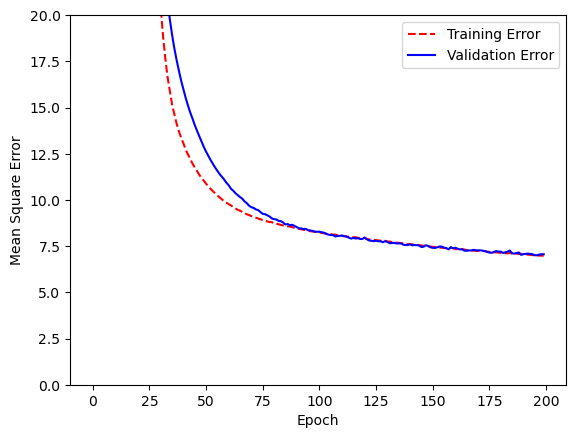

In [13]:
start = time.time()
history = model.fit(X_train, y_train,
                    epochs = 200,
                    validation_split = 0.2,  
                    verbose = 0) 

end = time.time()
time_1 = end - start
print('Time training:', time_1)
plot_history(history)

## Dispersion and R^2

3/3 [==============================] - 0s 2ms/step


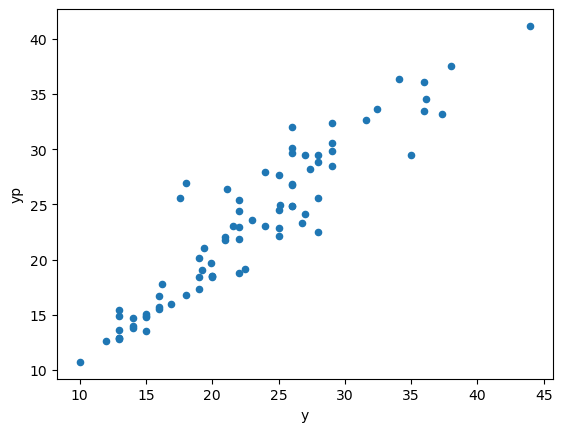

R² model: 0.8738


In [14]:
yp = model.predict(X_test)

df = pd.DataFrame({'y': y_test, 'yp': yp.flatten()})
df.plot.scatter(x='y', y='yp')
plt.show()

r2_1 = r2_score(df['y'], df['yp'])
print(f"R² model: {r2_1:.4f}")

# Model 2: Even more simplified

I simplified the the architecture even more and reduced epochs for more efficiency.

In [15]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear') 
])

# Compile
model.compile(loss='mse',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mse','mae'])

## Training

Time training: 5.552352666854858


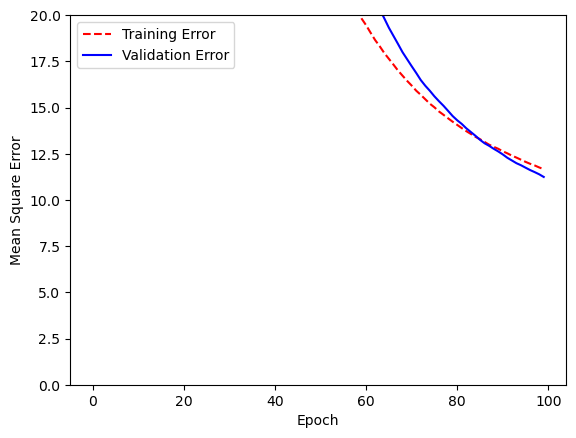

In [16]:
start = time.time()
history = model.fit(X_train, y_train,
                    epochs = 100,
                    validation_split = 0.2, 
                    verbose = 0) 

end = time.time()
time_2 = end - start
print('Time training:', time_2)
plot_history(history)

## Dispersion and R^2

3/3 [==============================] - 0s 2ms/step


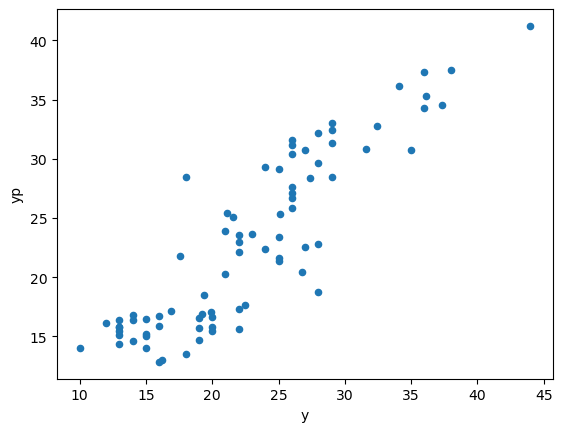

R² model: 0.7698


In [17]:
yp = model.predict(X_test)

df = pd.DataFrame({'y': y_test, 'yp': yp.flatten()})
df.plot.scatter(x='y', y='yp')
plt.show()

r2_2 = r2_score(df['y'], df['yp'])
print(f"R² model: {r2_2:.4f}")

# Model 3: Efficient

Introduced BatchNormalization for improved stability, switched to SGD with momentum for optimization, and implemented EarlyStopping to prevent overfitting, enhancing efficiency and performance compared to the simplified models.

In [18]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(1, activation='linear') 
])

# Compile
model.compile(loss='mse',
              optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics = ['mse','mae'])

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

## Training

Restoring model weights from the end of the best epoch: 31.
Epoch 41: early stopping
Time training: 2.4421586990356445


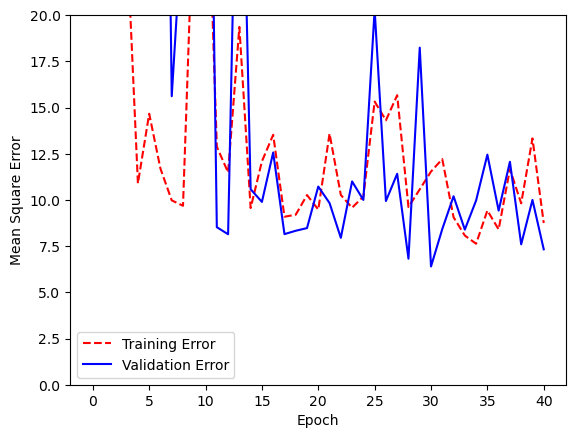

In [19]:
start = time.time()
history = model.fit(X_train, y_train,
                    epochs = 300,
                    validation_split = 0.2, 
                    callbacks = [early_stopping],
                    verbose = 0) 

end = time.time()
time_3 = end - start
print('Time training:', time_3)
plot_history(history)

## Dispersion and R^2

3/3 [==============================] - 0s 2ms/step


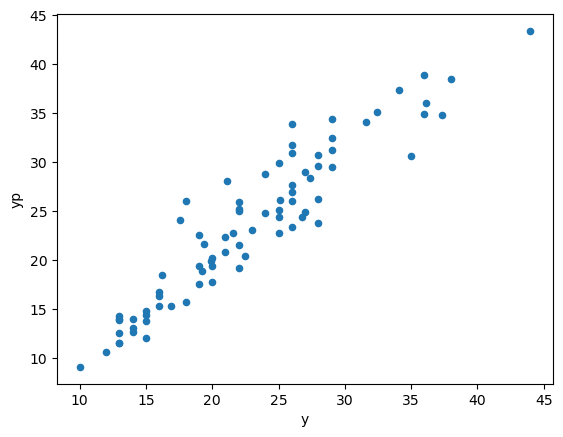

R² model: 0.8496


In [20]:
yp = model.predict(X_test)

df = pd.DataFrame({'y': y_test, 'yp': yp.flatten()})
df.plot.scatter(x='y', y='yp')
plt.show()

r2_3 = r2_score(df['y'], df['yp'])
print(f"R² model: {r2_3:.4f}")

# Summary

In [21]:
print(f'Model reference took {time_0:.0f} seconds and R^2 = {r2_0:.2f}')
print(f'Model 1 (Simplified) took {time_1:.0f} seconds and R^2 = {r2_1:.2f}')
print(f'Model 2 (+Simplified) took {time_2:.0f} seconds and R^2 = {r2_2:.2f}')
print(f'Model 3 (Efficient) took {time_3:.0f} seconds and R^2 = {r2_3:.2f}')

Model reference took 12 seconds and R^2 = 0.85
Model 1 (Simplified) took 9 seconds and R^2 = 0.87
Model 2 (+Simplified) took 6 seconds and R^2 = 0.77
Model 3 (Efficient) took 2 seconds and R^2 = 0.85


The initial model set a benchmark with a score of 0.85, requiring 12 seconds. Model 1 improved on this, enhancing the score to 0.87 in 9 seconds. Model 2 further reduced the time to 6 seconds, though its score slightly decreased to 0.77. Lastly, Model 3 achieved a remarkable balance, securing a score of 0.85 in just 2 seconds. These results demonstrate the possibility of increasing efficiency without significantly compromising the quality of predictions.

In light of our findings, especially when predicting a continuous variable like MPG where precision and speed are crucial, we recommend adopting the modifications seen in Model 3 to enhance model efficiency. By integrating BatchNormalization and implementing an EarlyStopping callback, along with utilizing the SGD optimizer for its momentum feature, we can achieve a more stable and faster learning process. These adjustments offer a compelling approach to balancing model performance with computational efficiency, making Model 3 an exemplary choice for tasks demanding both accuracy and speed in their outcomes.